# Time-Series
https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

In [125]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import DateOffset

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Get the Data

In [126]:
df = pd.read_csv('2_train.csv')
df['obsdate'] = df['Datetime'].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M', errors='ignore'))
df = df.sort_values(['obsdate'])
df.index= df['obsdate']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 4 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
obsdate     18288 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 714.4+ KB


# 2. Visualize the Data

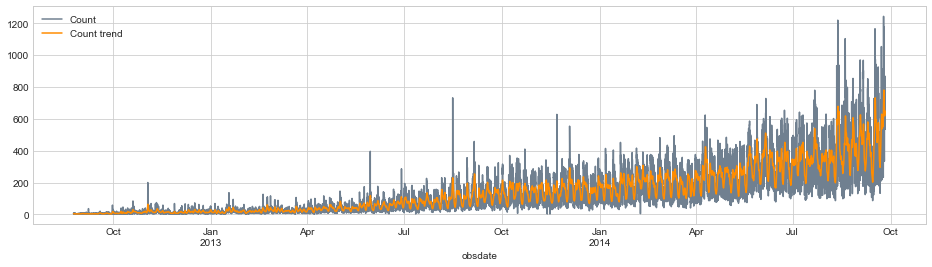

In [127]:
Count_cycle, Count_trend = sm.tsa.filters.hpfilter(df['Count'])
df['Count_trend'] = Count_trend
df['Count'].plot(color='slategray', figsize=(16,4),label='Count')
df['Count_trend'].plot(color='darkorange',label='Count trend')
plt.legend()

In [128]:
test_period = df[(df['obsdate']>='2013-09-26') & (df['obsdate']<'2014-04-27')].copy()
test_period.drop(['ID','Datetime','obsdate'],axis=1,inplace=True)
test_period.to_csv('2 test_period.csv')
test_end1 = df[df['obsdate']=='2014-09-25 23:00:00'].copy()
test_end2 = df[df['obsdate']=='2013-09-25 23:00:00'].copy()

# 3. Prediction of Future Values

In [129]:
#submitted all 0 (RMSE = 657.5)
#average of count for the period 2013-09-26 to 2014-04-26 is 172.5
test_period['Forecast']=test_period['Count'].apply(lambda x: x * 657.5 / 172.5)
test_period.to_csv('2 Out.csv')